# real world examples

In [121]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
palette = 'muted'
sns.set_palette(palette)
sns.set_color_codes(palette)

In [134]:
data = pd.read_csv('../../data/export/DXY_PRICES_DAILY.csv', index_col=0, parse_dates=True)
data['chgo'] = data['o'].pct_change() * 100
data['chgh'] = data['h'].pct_change() * 100
data['chgl'] = data['l'].pct_change() * 100
data['chgav'] = data['av'].pct_change() * 100
data['chgme'] = data['me'].pct_change() * 100
data['chgty'] = data['ty'].pct_change() * 100
data['chgwc'] = data['wc'].pct_change() * 100
data.dropna(inplace=True)
data = data.round(2)
data

,c,o,h,l,av,me,ty,wc,chg,chgo,chgh,chgl,chgav,chgme,chgty,chgwc
time,,,,,,,,,,,,,,,,
2007-01-03,83.92,83.27,84.04,83.17,83.60,83.60,83.71,83.76,0.87,-0.23,0.51,0.02,0.30,0.26,0.47,0.56
2007-01-04,84.32,83.91,84.39,83.84,84.12,84.12,84.18,84.22,0.48,0.77,0.42,0.81,0.62,0.62,0.56,0.55
2007-01-05,84.63,84.29,84.81,84.15,84.47,84.48,84.53,84.56,0.37,0.45,0.50,0.37,0.42,0.43,0.42,0.40
2007-01-08,84.60,84.64,84.84,84.49,84.64,84.66,84.64,84.63,-0.04,0.42,0.04,0.40,0.20,0.21,0.13,0.08
2007-01-09,84.74,84.49,84.84,84.43,84.62,84.64,84.67,84.69,0.17,-0.18,0.00,-0.07,-0.02,-0.02,0.04,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-22,106.13,106.11,106.39,105.98,106.15,106.18,106.17,106.16,0.02,-0.01,0.24,-0.09,0.04,0.07,0.06,0.05
2024-04-23,105.68,106.13,106.24,105.61,105.92,105.92,105.84,105.80,-0.42,0.02,-0.14,-0.35,-0.22,-0.24,-0.31,-0.34
2024-04-24,105.81,105.68,105.95,105.59,105.76,105.77,105.78,105.79,0.12,-0.42,-0.27,-0.02,-0.15,-0.14,-0.06,-0.01


In [123]:
data.shape

(4512, 16)

In [124]:
columns = 'wc'

In [125]:
data[columns].describe()

count    4512.000000
mean       89.553619
std         9.740492
min        71.330000
25%        80.477500
50%        91.235000
75%        97.242500
max       114.000000
Name: wc, dtype: float64

In [126]:
data[columns].dropna(inplace=True)

In [127]:
xdata = data[columns].to_numpy()
xdata.size

4512

In [128]:
mu = np.mean(xdata)
mu

89.55361923758865

In [129]:
sd = np.std(xdata)
sd

9.739412586752064

In [130]:
min(xdata), max(xdata)

(71.33, 114.0)

In [131]:
x = np.linspace(min(xdata), max(xdata), xdata.size)

In [132]:
pdf = stats.norm(mu, sd).pdf(x)

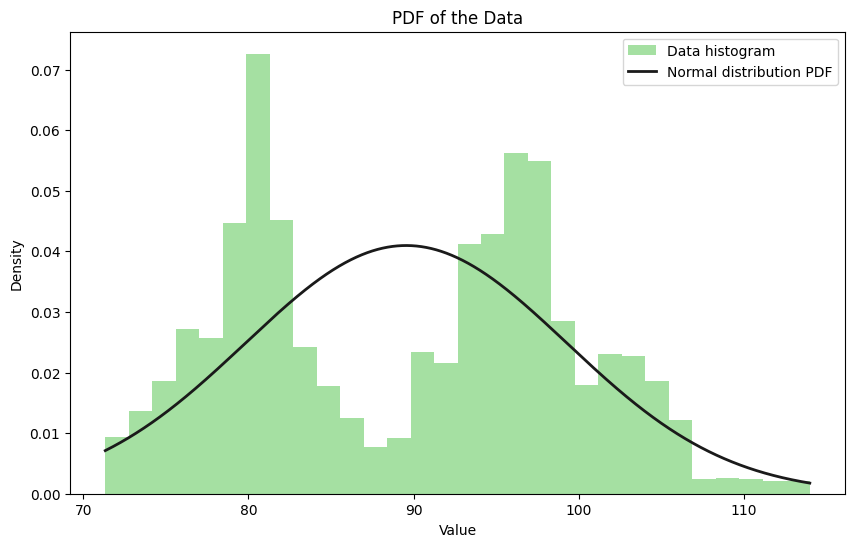

In [133]:
plt.figure(figsize=(10, 6))
plt.hist(xdata, bins=30, density=True, alpha=0.6, color='g', label='Data histogram')
plt.plot(x, pdf, 'k', linewidth=2, label='Normal distribution PDF')
plt.title('PDF of the Data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(loc='best')
plt.show()